In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize'] = 10,4

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [2]:
data = pd.read_csv('water.csv', sep=',', index_col=0)
data.head(10)

,location,town,mortality,hardness
1,South,Bath,1247,105
2,North,Birkenhead,1668,17
3,South,Birmingham,1466,5
4,North,Blackburn,1800,14
5,North,Blackpool,1609,18
6,North,Bolton,1558,10
7,North,Bootle,1807,15
8,South,Bournemouth,1299,78
9,North,Bradford,1637,10
10,South,Brighton,1359,84


Все города
___________________________

Коэффициенты корреляции:

Пирсон:
           hardness  mortality
hardness   1.000000  -0.654849
mortality -0.654849   1.000000

Спирман:
           hardness  mortality
hardness   1.000000  -0.631665
mortality -0.631665   1.000000



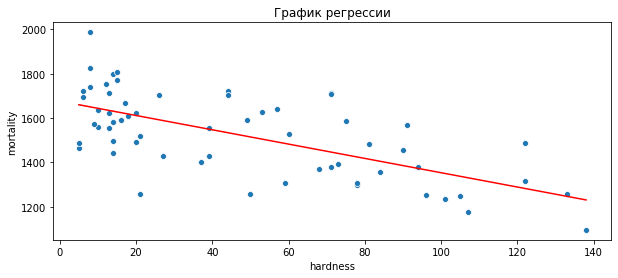

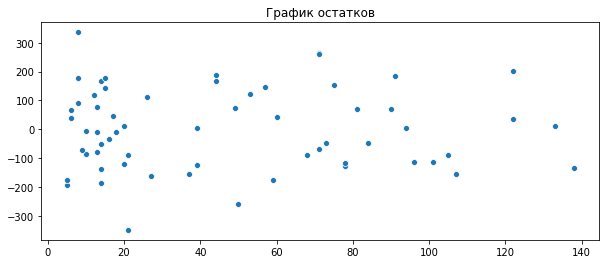


Коэффициент детерминации: 0.42882671931249716


In [3]:
df = data

X = sm.add_constant(df[['hardness']].values)
Y = df['mortality'].values

model = sm.OLS(Y, X)
results = model.fit()

print('Все города\n___________________________\n')

print(f"Коэффициенты корреляции:\n\nПирсон:\n{df[['hardness', 'mortality']].corr()}\n\nСпирман:\n{df[['hardness', 'mortality']].corr(method='spearman')}\n")
sns.scatterplot(x='hardness', y='mortality', data=df)
sns.lineplot(X[:,1], results.fittedvalues, color='r').set_title("График регрессии")
plt.show()
sns.scatterplot(X[:, 1], results.resid).set_title("График остатков")
plt.show()

print('\nКоэффициент детерминации:', results.rsquared)

Северные города
___________________________

Коэффициенты корреляции:

Пирсон:
           hardness  mortality
hardness   1.000000  -0.368598
mortality -0.368598   1.000000

Спирман:
           hardness  mortality
hardness   1.000000  -0.404208
mortality -0.404208   1.000000



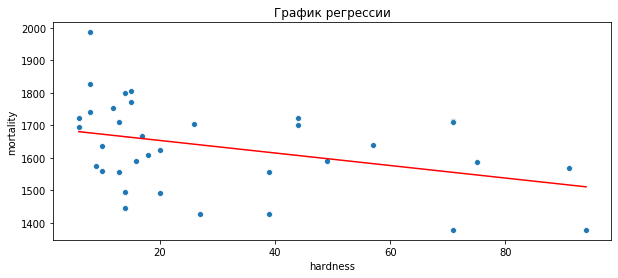

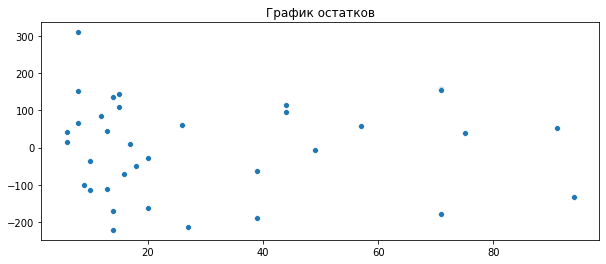


Коэффициент детерминации: 0.13586436642071753


In [4]:
# северные города
df = data[data['location'] == 'North']

X = sm.add_constant(df[['hardness']].values)
Y = df['mortality'].values

model = sm.OLS(Y, X)
results = model.fit()

print('Северные города\n___________________________\n')
print(f"Коэффициенты корреляции:\n\nПирсон:\n{df[['hardness', 'mortality']].corr()}\n\nСпирман:\n{df[['hardness', 'mortality']].corr(method='spearman')}\n")
sns.scatterplot(x='hardness', y='mortality', data=df)
sns.lineplot(X[:,1], results.fittedvalues, color='r').set_title("График регрессии")
plt.show()
sns.scatterplot(X[:, 1], results.resid).set_title("График остатков")
plt.show()

print('\nКоэффициент детерминации:', results.rsquared)

Южные города
___________________________

Коэффициенты корреляции:

Пирсон:
           hardness  mortality
hardness   1.000000  -0.602153
mortality -0.602153   1.000000

Спирман:
           hardness  mortality
hardness   1.000000  -0.595723
mortality -0.595723   1.000000



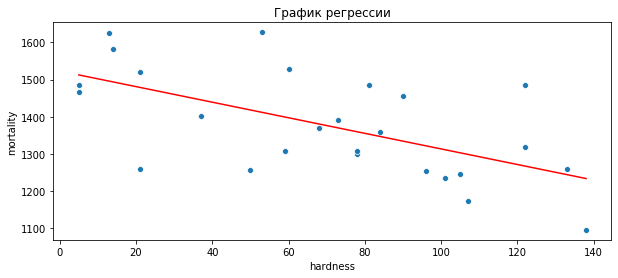

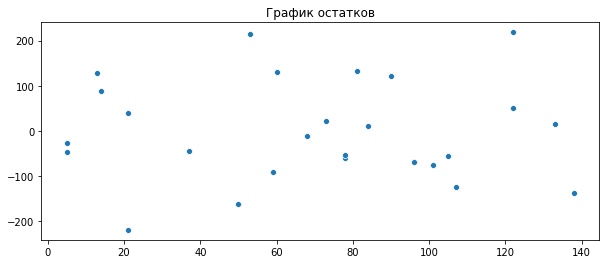


Коэффициент детерминации: 0.3625885624364602


In [5]:
# южные города
df = data[data['location'] == 'South']

X = sm.add_constant(df[['hardness']].values)
Y = df['mortality'].values

model = sm.OLS(Y, X)
results = model.fit()

print('Южные города\n___________________________\n')
print(f"Коэффициенты корреляции:\n\nПирсон:\n{df[['hardness', 'mortality']].corr()}\n\nСпирман:\n{df[['hardness', 'mortality']].corr(method='spearman')}\n")
sns.scatterplot(x='hardness', y='mortality', data=df)
sns.lineplot(X[:,1], results.fittedvalues, color='r').set_title("График регрессии")
plt.show()
sns.scatterplot(X[:, 1], results.resid).set_title("График остатков")
plt.show()

print('\nКоэффициент детерминации:', results.rsquared)

Если брать города по отдельности, корреляционная связь между двумя факторами гораздо меньше, равно как и коэффициент детерминации для рассчитаных моделей.